# Susceptible-Infected-Recovered (SIR) Epidemic Model

The SIR model adds a recovery or removal rate to the exponential model.
These three populations form a set of linked equations that can be solved numerically.

The model varies with the values for the effective contact rate ($\beta$) and the recovery rate ($\gamma$) which are still being established in the literature.
However, the peak number of infections with plausible values for $\beta$ and $\gamma$ are all very high and worthy of concern.

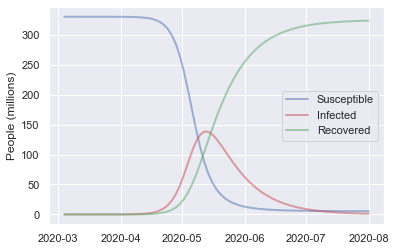

In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# assumptions
effective_contact_rate = 0.3
recovery_rate = 1./14 
beds_per_infected = 0.1
ventilators_per_infected = 0.05
deaths_per_recovered = 0.02

# initial values
population = 330e6
time_range_days = (0, 150)
initial_infected = 118        
initial_date = np.datetime64('2020-03-04')
initial_recovered = 0
initial_susceptible = population - initial_infected - initial_recovered
initial_conditions = initial_susceptible, initial_infected, initial_recovered

# slopes of SIR model
def slopes(t, y, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# run simulation
simulation = solve_ivp(slopes, 
                       time_range_days, 
                       initial_conditions, 
                       args=(population, effective_contact_rate, recovery_rate), 
                       max_step=2)
S, I, R = simulation.y
days = simulation.t

# make plot and place calendar dates on graph
fig, ax = plt.subplots()
dates = [initial_date + np.timedelta64(1, 'D') * t for t in days]
ax.plot(dates, S/1e6, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(dates, I/1e6, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(dates, R/1e6, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_ylabel('People (millions)')
ax.legend()
plt.show()

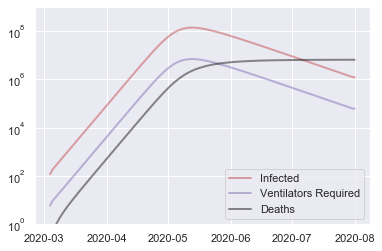

In [3]:
# Estimate health care system needs
beds = I * beds_per_infected
ventilators = I * ventilators_per_infected
deaths = R * deaths_per_recovered

fig, ax = plt.subplots()
ax.plot(dates, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(dates, ventilators, 'm', alpha=0.5, lw=2, label='Ventilators Required')
ax.plot(dates, deaths, 'k', alpha=0.5, lw=2, label='Deaths')
ax.set_yscale('log')
ax.set_ylim(1,1e9)
ax.legend()
plt.show()